In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/rfm_train.csv')
df.head()

,User number,Recency,Frequency,Moneytary,Cluster Label
0,101000282,0.085362,0.001682,0.033211,0
1,101000283,0.025292,0.002523,0.035920,1
2,101000340,0.088523,0.000000,0.003857,0
3,101000353,0.113815,0.000000,0.003857,0
4,101000373,0.113815,0.000000,0.001893,0


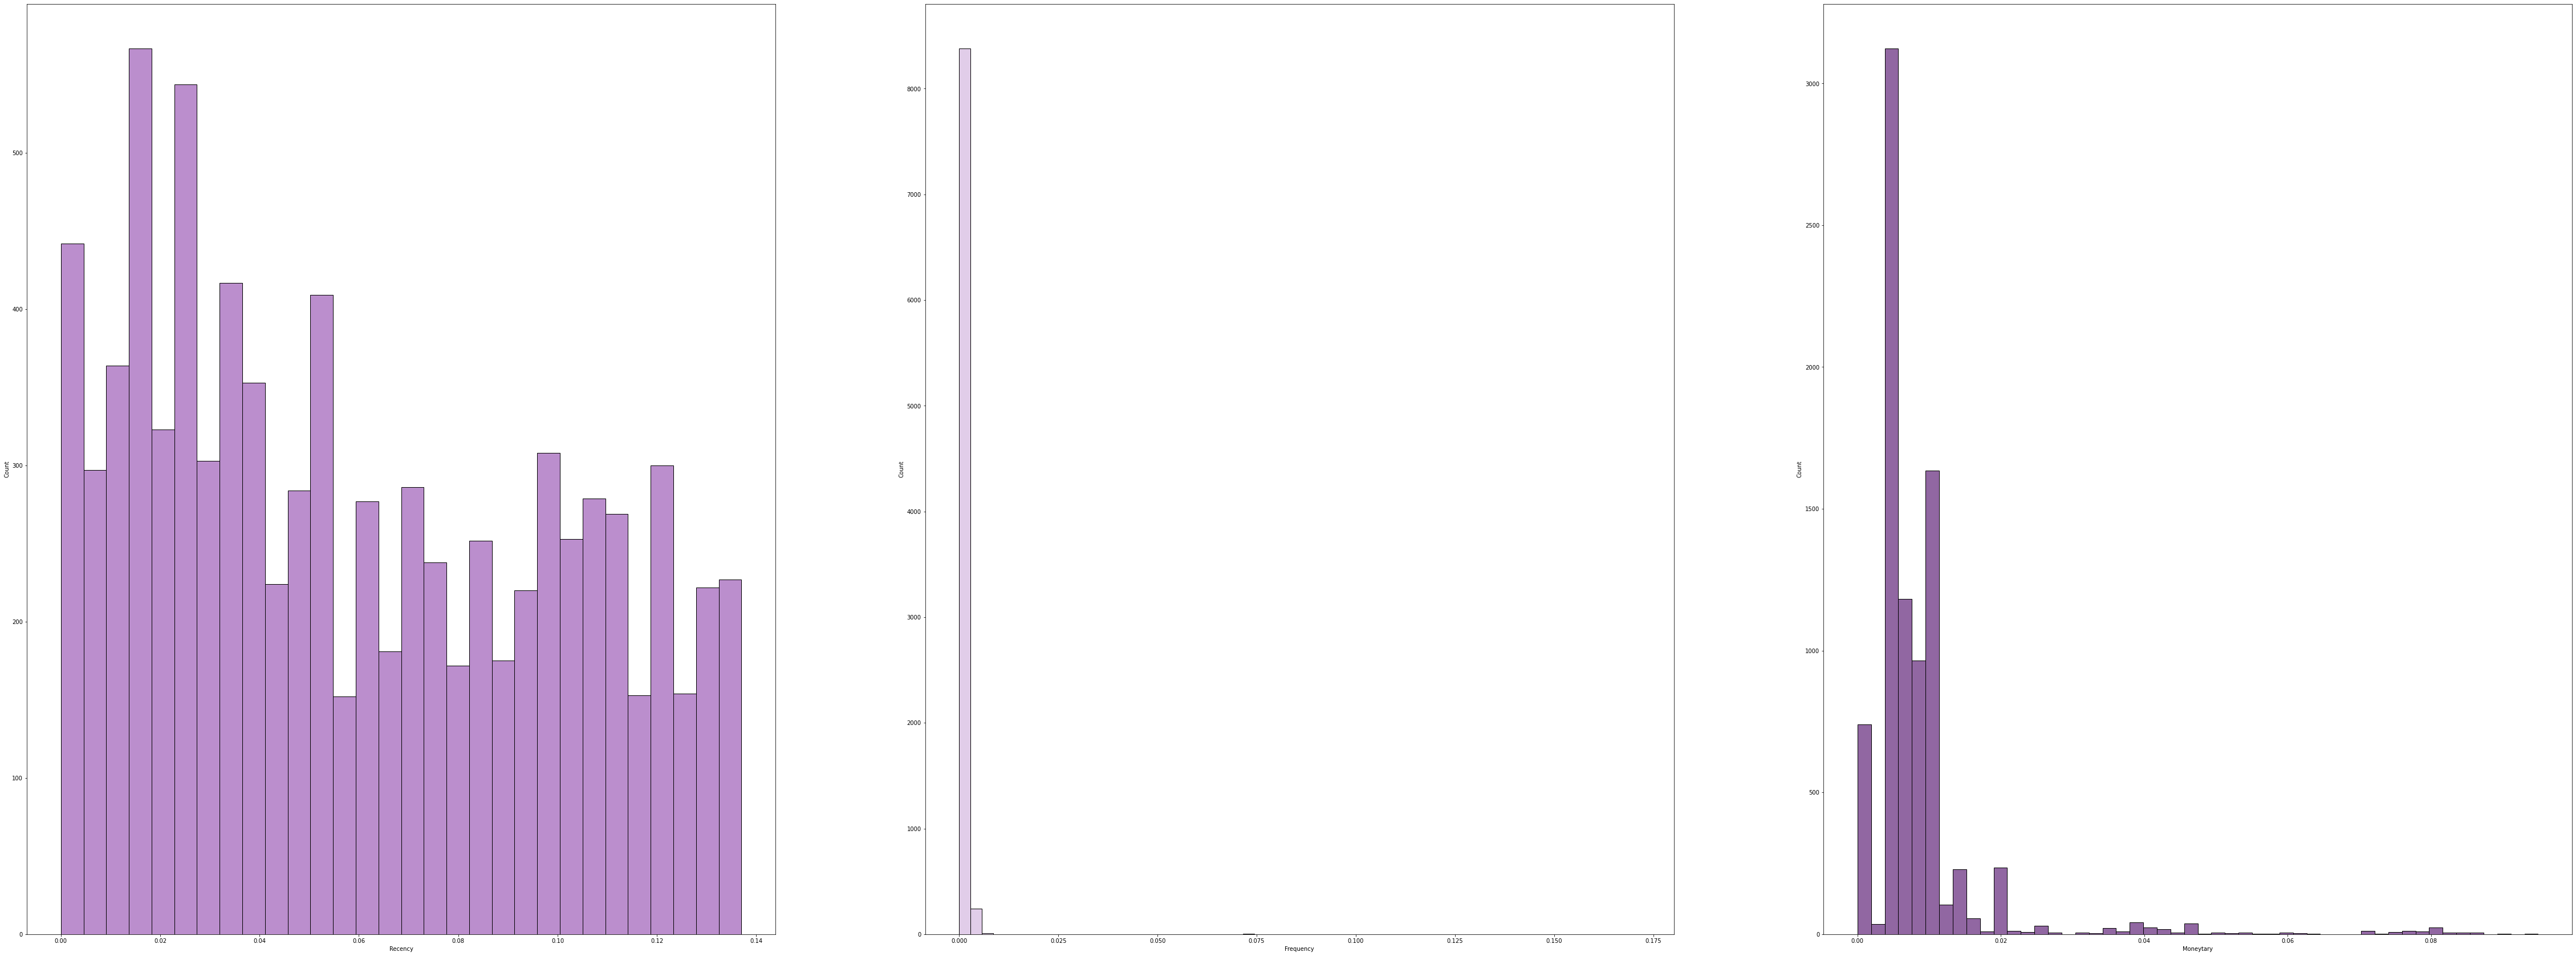

In [3]:
fig, ax = plt.subplots(figsize=(80, 30), ncols=3, nrows=1)
pallete= ['#A569BD','#D7BDE2','pink']
sns.histplot(df, x='Recency', bins=30, ax=ax[0], color='#A569BD')
sns.histplot(df, x='Frequency', bins=60, ax=ax[1],color='#D7BDE2')
sns.histplot(df, x='Moneytary', bins=50, ax=ax[2], color= '#6C3483')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


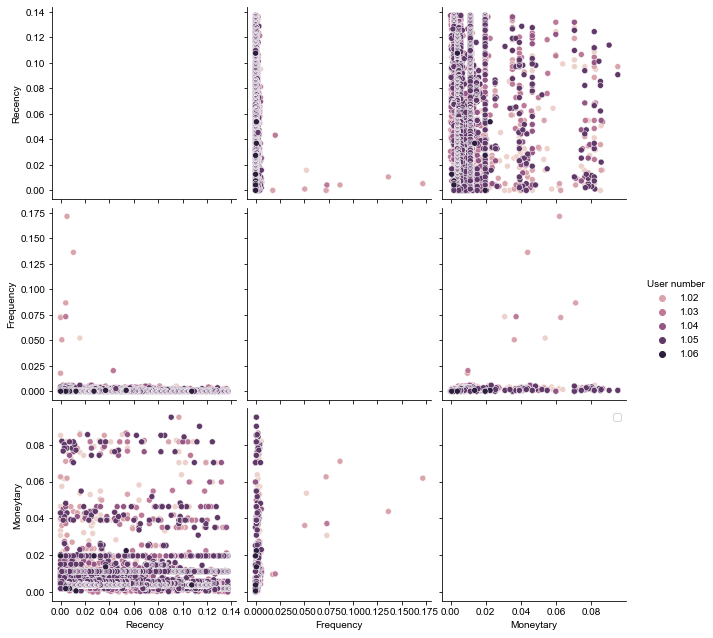

In [4]:
sns.color_palette("flare", as_cmap=True)
sns.pairplot(df.iloc[:, :4], height=6, size=3, hue='User number')
legend = plt.legend()
sns.set(font_scale=0.5)
plt.savefig('pairplot.jpg')
plt.show()

PLOT 3-D GRAPH OF R-F-M FOR 3 CLUSTERS

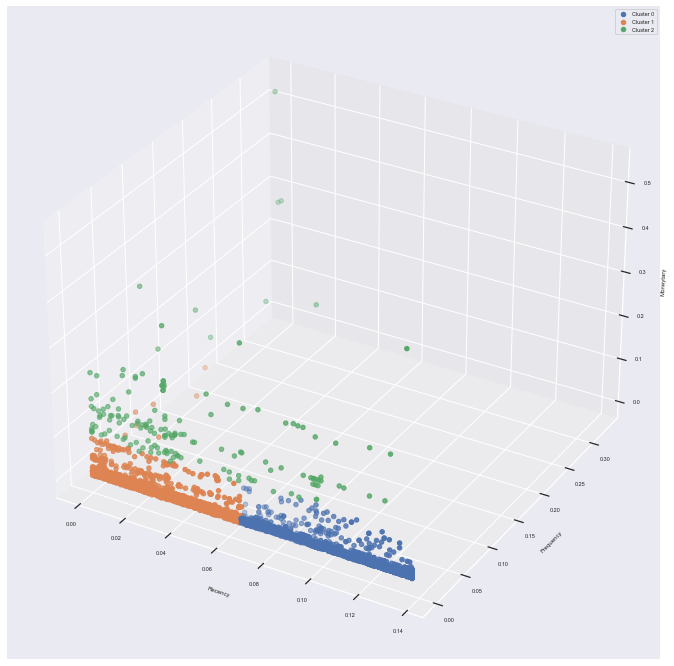

In [5]:
cluster_kmeans = pd.read_csv('../../data/cluster_kmeans.csv')
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(projection='3d')

label = cluster_kmeans['Cluster Label']
for cluster_label in sorted(label.unique()):
    cluster_data = cluster_kmeans[label == cluster_label]
    ax.scatter(cluster_data.Recency,
               cluster_data.Frequency,
               cluster_data.Moneytary,
               label=f'Cluster {cluster_label}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Moneytary')

plt.legend(loc='best')
plt.savefig('3d.jpg')
plt.show()

<Figure size 4896x720 with 0 Axes>

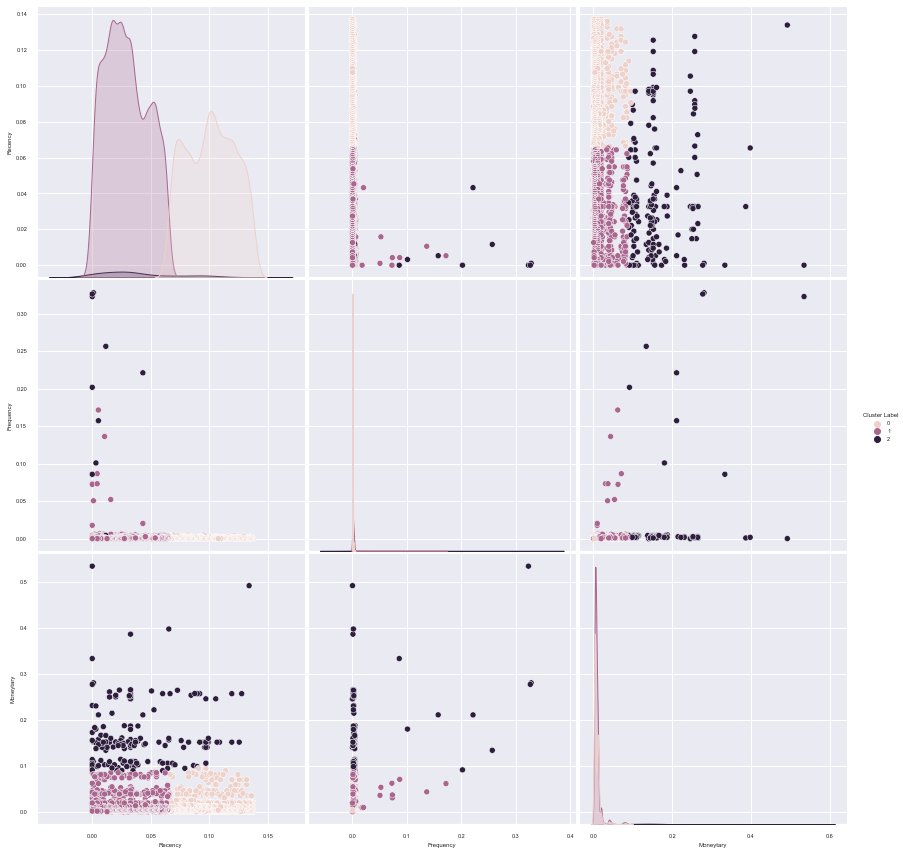

In [6]:
cluster_kmeans = cluster_kmeans.iloc[:,1:]
fig = plt.figure(figsize=(68, 10))
sns.cubehelix_palette(as_cmap=True)
sns.pairplot(cluster_kmeans, hue='Cluster Label', height=4)
sns.set(font_scale=1.5)
plt.show()

OUR MODEL RESULTS PLOT

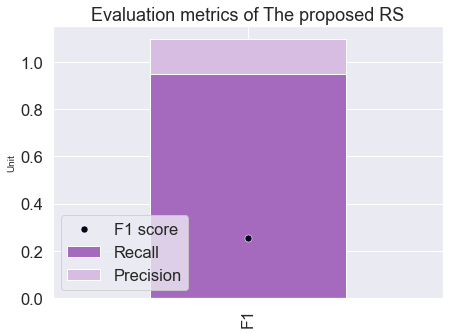

In [7]:
import pandas as pd

name = ['The Proposed Model']
plotdata = pd.DataFrame({ 
     "Recall":[0.94833],
    "Precision":[0.14634]},
    index=['F1'])
f1 = [0.25355]
pallete= ['#A569BD','#D7BDE2']
plotdata.plot(kind='bar', stacked=True,figsize=(7, 5), color= pallete, width=0.5)


sns.scatterplot(x=name, y=f1, label='F1 score', c=f1, s=50)

plt.ylabel("Unit", fontsize=10)
plt.title("Evaluation metrics of The proposed RS")

plt.show()

TOP-N SENSITIVITY ANALYSIS

In [8]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

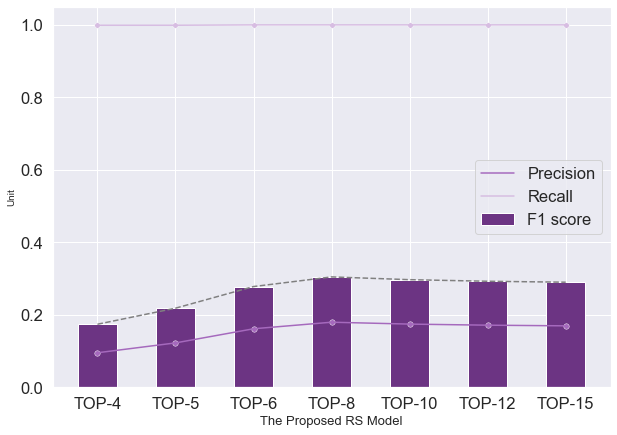

In [9]:
precision = [0.0953, 0.1225, 0.1615, 0.1796, 0.1744,0.1714,0.1696]
f1 = [0.174, 0.2183, 0.278, 0.3046, 0.2970, 0.2926,0.29]
recall = [ 0.999, 0.999, 1.0, 1.0, 1.0, 1.0,1.0]

name = ['TOP-4', 'TOP-5', 'TOP-6','TOP-8', 'TOP-10', 'TOP-12', 'TOP-15']
palette = ['r','b','g','y','orange','pink']

fig, ax = plt.subplots(figsize=(10, 7))

plt.bar(x=name,  height=f1, label='F1 score', color = '#6C3483', width = 0.5)
sns.lineplot(x=name, y=f1, linestyle='--', color = 'grey')


sns.lineplot(x=name, y=precision, label='Precision', color='#A569BD')
sns.scatterplot(x=name, y=precision, s=30, color='#A569BD')

sns.lineplot(x=name, y=recall, label='Recall', color='#D7BDE2')
sns.scatterplot(x=name, y=recall, s=30, color='#D7BDE2')

plt.xlabel('The Proposed RS Model', fontsize=13)
plt.ylabel('Unit', fontsize=10)
plt.savefig('summary_plot.png')
plt.show()

model comparasion

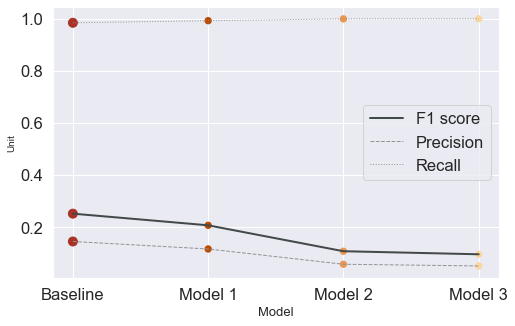

In [10]:
f1 = [0.2506, 0.20579, 0.10618, 0.0944]
precision = [0.1436, 0.1148, 0.05607, 0.049562]
recall = [0.9844, 0.9924, 0.9994, 0.9995]
time=[98.1, 83.92, 237.69, 265.85]

name = ['Baseline', 'Model 1', 'Model 2', 'Model 3']
palette = ['#A93226','#BA4A00','#EB984E','#FAD7A0']

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x=name, y=f1,  label='F1 score', color ='#424949', linewidth = 2)
plt.scatter(x=name, y=f1, sizes = [80,40,40,40] , color=palette, marker = "o")

sns.lineplot(x=name, y=precision, label='Precision', linewidth = 1, color='#909497',linestyle='--')
plt.scatter(x=name, y=precision, sizes = [80,40,40,40] , color=palette, marker = "o")

sns.lineplot(x=name, y=recall, label='Recall', linewidth = 1, color='#909497',linestyle='dotted')
plt.scatter(x=name, y=recall, sizes = [80,40,40,40] , color=palette, marker = "o")

plt.xlabel('Model', fontsize=13)
plt.ylabel('Unit', fontsize=10)
plt.savefig('summary_plot.png')
plt.show()
